In [1]:
import pandas as pd
import numpy as np

data_path = './0.csv'

df_sample = pd.read_csv(data_path, nrows=5)
df_sample

,Unnamed: 0,0
0,0,[ 2.4820118 -0.97476006 -4.27486 1.649986...
1,1,[ 1.306514 0.6067919 -4.951896 1.236016...
2,2,[ 1.3065140e+00 6.0679191e-01 -4.9518962e+00 ...
3,3,[ 2.3916643 0.20941967 -4.0494895 -0.03...
4,4,[ 2.4820118 -0.97476006 -4.27486 1.649986...


In [2]:
def parse_vector(vector_str):
    vector_str = vector_str.strip('[]')
    vector_str = vector_str.replace('\n', '')
    vector = np.fromstring(vector_str, sep=' ')
    return vector

df_full = pd.read_csv(data_path)
vectors = df_full['0'].apply(parse_vector)

vector_array = np.stack(vectors.values)

vector_array.shape

(38049, 280)

In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Downscaling using PCA
pca = PCA(n_components=50)
vector_array_pca = pca.fit_transform(vector_array)

In [4]:
# t-SNE is better
tsne = TSNE(n_components=2)
vector_array_tsne = tsne.fit_transform(vector_array_pca)

In [5]:
# Calculate and print the variance explained ratio
# 计算并打印方差解释比
print(pca.explained_variance_ratio_)

[0.09838175 0.06784224 0.04833471 0.04104487 0.03557817 0.03327178
 0.02957489 0.02846815 0.02609192 0.02346394 0.02291925 0.02261198
 0.02133993 0.02079246 0.01842367 0.01697583 0.01653979 0.0158672
 0.01553982 0.01512654 0.01445752 0.01375351 0.01305558 0.01247163
 0.0116635  0.01154285 0.01131184 0.01033863 0.01025468 0.00993044
 0.00980539 0.00869788 0.00852391 0.00836925 0.00810334 0.00787369
 0.00772756 0.00751038 0.00734659 0.00698562 0.00691159 0.00656396
 0.00628731 0.00602023 0.00591698 0.0058963  0.00563373 0.00531938
 0.00522749 0.00509011]


## 聚类依据：

如果你更关注全局数据结构和保留更多的原始信息，那么应该使用 PCA降维后的数据 (vector_array_pca)。PCA保留了数据的最大方差，尽管它可能会损失一些复杂的非线性关系。

如果你的目标是在可视化或者需要更好地理解数据的局部结构，那么 t-SNE降维后的数据 (vector_array_tsne) 更合适。t-SNE非常擅长于展示高维数据在二维或三维空间中的局部结构，这使得它成为探索性数据分析中的有力工具。

If you are more concerned with global data structure and preserving more of the original information, then you should use PCA after dimensionality reduction (vector_array_pca). pca preserves the maximum variance of the data, although it may lose some of the complexity of the non-linear relationships.

If your goal is in visualisation or you need to better understand the local structure of the data, then t-SNE after dimensionality reduction (vector_array_tsne) is more appropriate. t-SNE is very good at showing the local structure of high-dimensional data in 2D or 3D space, which makes it a powerful tool in exploratory data analysis.

In [24]:
from sklearn.cluster import DBSCAN

# Initialising the DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=10)

clusters = dbscan.fit_predict(vector_array_tsne)
# The clusters variable contains the cluster labels for each point, with -1 indicating a noisy point.

Contour Coefficient: measures the distance of a sample point from points in its same cluster compared to points in other clusters. The value ranges from -1 to 1, with higher values indicating better intra-cluster clustering and inter-cluster separation.

Calinski-Harabasz index: also known as the variance ratio criterion, it is the ratio of the intra-cluster scatter to the inter-cluster scatter, with larger values indicating better clustering.

Davies-Bouldin index: this index is the average maximum value of inter-cluster similarity, smaller values indicate better clustering.

轮廓系数：测量样本点与其同簇中的点相比于其他簇中的点的距离。该值的范围在-1到1之间，值越高表示簇内聚和簇间分离得越好。

Calinski-Harabasz指数：也称为方差比准则，它是簇内散度和簇间散度的比值，值越大表示聚类效果越好。

Davies-Bouldin指数：该指数是簇间相似性的平均最大值，值越小表示聚类效果越好。

In [25]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

if len(set(clusters)) > 1 and len(set(clusters)) < len(vector_array_tsne) - 1:
    silhouette_avg = silhouette_score(vector_array_tsne, clusters)
else:
    silhouette_avg = 'Cannot be computed (need at least 2 clusters and fewer clusters than samples-1)'

calinski_harabasz_avg = calinski_harabasz_score(vector_array_tsne, clusters)

davies_bouldin_avg = davies_bouldin_score(vector_array_tsne, clusters)

silhouette_avg, calinski_harabasz_avg, davies_bouldin_avg


(-0.04517132, 39.983182697128996, 1.413646459182854)

In [26]:
clusters_pca = dbscan.fit_predict(vector_array_pca)
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

if len(set(clusters_pca)) > 1 and len(set(clusters_pca)) < len(vector_array_pca) - 1:
    silhouette_avg = silhouette_score(vector_array_pca, clusters_pca)
else:
    silhouette_avg = 'Cannot be computed (need at least 2 clusters and fewer clusters than samples-1)'

calinski_harabasz_avg = calinski_harabasz_score(vector_array_pca, clusters_pca)

davies_bouldin_avg = davies_bouldin_score(vector_array_pca, clusters_pca)

silhouette_avg, calinski_harabasz_avg, davies_bouldin_avg

(-0.30799846346290033, 32.40305104132967, 1.0033758738651646)

## min_samples=5

In [27]:
# min_samples=5
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)

clusters = dbscan.fit_predict(vector_array_tsne)

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

if len(set(clusters)) > 1 and len(set(clusters)) < len(vector_array_tsne) - 1:
    silhouette_avg = silhouette_score(vector_array_tsne, clusters)
else:
    silhouette_avg = 'Cannot be computed (need at least 2 clusters and fewer clusters than samples-1)'

calinski_harabasz_avg = calinski_harabasz_score(vector_array_tsne, clusters)

davies_bouldin_avg = davies_bouldin_score(vector_array_tsne, clusters)

silhouette_avg, calinski_harabasz_avg, davies_bouldin_avg


(0.392133, 77.09763126925421, 1.4556907121943805)

In [28]:
clusters_pca = dbscan.fit_predict(vector_array_pca)
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

if len(set(clusters_pca)) > 1 and len(set(clusters_pca)) < len(vector_array_pca) - 1:
    silhouette_avg = silhouette_score(vector_array_pca, clusters_pca)
else:
    silhouette_avg = 'Cannot be computed (need at least 2 clusters and fewer clusters than samples-1)'

calinski_harabasz_avg = calinski_harabasz_score(vector_array_pca, clusters_pca)

davies_bouldin_avg = davies_bouldin_score(vector_array_pca, clusters_pca)

silhouette_avg, calinski_harabasz_avg, davies_bouldin_avg

(-0.31869761538497665, 16.686484273779772, 1.0026546728932917)

## min_samples=3

In [29]:
# min_samples=3 for now the best
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=3)

clusters = dbscan.fit_predict(vector_array_tsne)

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

if len(set(clusters)) > 1 and len(set(clusters)) < len(vector_array_tsne) - 1:
    silhouette_avg = silhouette_score(vector_array_tsne, clusters)
else:
    silhouette_avg = 'Cannot be computed (need at least 2 clusters and fewer clusters than samples-1)'

calinski_harabasz_avg = calinski_harabasz_score(vector_array_tsne, clusters)

davies_bouldin_avg = davies_bouldin_score(vector_array_tsne, clusters)

silhouette_avg, calinski_harabasz_avg, davies_bouldin_avg


(0.49829108, 146.00898681439406, 1.590633202267961)

In [30]:
clusters_pca = dbscan.fit_predict(vector_array_pca)
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

if len(set(clusters)) > 1 and len(set(clusters)) < len(vector_array_pca) - 1:
    silhouette_avg = silhouette_score(vector_array_pca, clusters)
else:
    silhouette_avg = 'Cannot be computed (need at least 2 clusters and fewer clusters than samples-1)'

calinski_harabasz_avg = calinski_harabasz_score(vector_array_pca, clusters)

davies_bouldin_avg = davies_bouldin_score(vector_array_pca, clusters)

silhouette_avg, calinski_harabasz_avg, davies_bouldin_avg

(0.23493598889363304, 88.40047104293059, 1.4214608735719843)

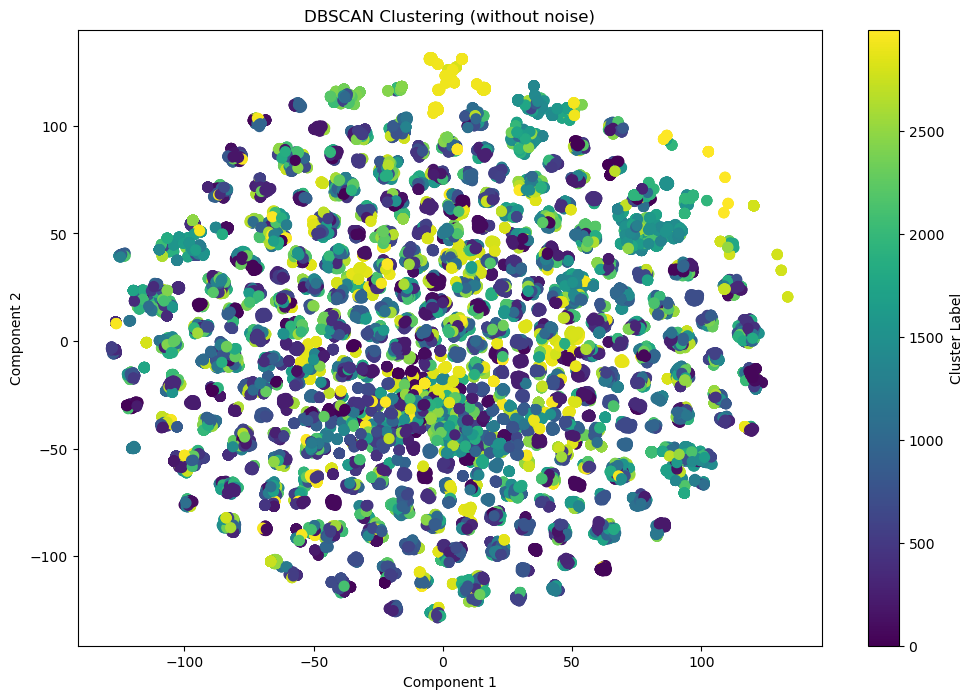

(0.49829108, 146.00898681439406, 1.590633202267961)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

dbscan = DBSCAN(eps=0.5, min_samples=3)
clusters = dbscan.fit_predict(vector_array_tsne)

if len(set(clusters)) > 1 and len(set(clusters)) < len(vector_array_tsne) - 1:
    silhouette_avg = silhouette_score(vector_array_tsne, clusters)
else:
    silhouette_avg = 'Cannot be computed (need at least 2 clusters and fewer clusters than samples-1)'

calinski_harabasz_avg = calinski_harabasz_score(vector_array_tsne, clusters)
davies_bouldin_avg = davies_bouldin_score(vector_array_tsne, clusters)

dbscan = DBSCAN(eps=0.5, min_samples=3)
clusters = dbscan.fit_predict(vector_array_tsne)

plt.figure(figsize=(12, 8))

vector_array_tsne_filtered = vector_array_tsne[clusters != -1]
clusters_filtered = clusters[clusters != -1]

plt.scatter(vector_array_tsne_filtered[:, 0], vector_array_tsne_filtered[:, 1], c=clusters_filtered, s=50, cmap='viridis')
plt.title('DBSCAN Clustering (without noise)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')

plt.show()
silhouette_avg, calinski_harabasz_avg, davies_bouldin_avg